<b>Importing TensorFlow and checking the version

In [5]:
import tensorflow as tf

print('Using TensorFlow version', tf.__version__)
tf.logging.set_verbosity(tf.logging.ERROR)

Using TensorFlow version 1.13.2


<b>Importing training data and test data from MNIST dataset

In [6]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Shape of xtrain : ",x_train.shape)

Shape of xtrain :  (60000, 28, 28)


Changing the label to one hot encoding and displaying it.

In [7]:
from tensorflow.python.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

print('y_train shape: ', y_train_encoded.shape)
print('y_test shape: ', y_test_encoded.shape)

y_train shape:  (60000, 10)
y_test shape:  (10000, 10)


<b>Preprocessing the training set to create input for the neural network model. The 28 x 28 features of x_train and x_test will be changed  to a 784 dimensional vector. This will be fed into the neural network to learn the weights.

In [26]:
import numpy as np

x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

print('x_train_reshaped shape: ', x_train_reshaped.shape)

x_train_reshaped shape:  (60000, 784)


<b>Normalize the training and test samples

In [9]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 1e-10
x_train_norm = (x_train_reshaped - x_mean)/(x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean)/(x_std + epsilon)

<b>Create and train neural network with following parameters: <br>
1) Input layer of 784 nodes<br>
2) 2 hidden layers with 128 nodes<br>
3) Output layer of 10 nodes(corresponding to digits from 0 to 9) where each node gives the probability of the image belonging to that class.

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation = 'relu', input_shape = (784,)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

h = model.fit(
    x_train_norm,
    y_train_encoded,
    epochs = 3
)

Epoch 1/3
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3644 - acc: 0.8953
Epoch 2/3
60000/60000 [==============================] - 5s 84us/sample - loss: 0.1827 - acc: 0.9467
Epoch 3/3
60000/60000 [==============================] - 5s 87us/sample - loss: 0.1377 - acc: 0.9597


<b> Evaluate the model using the test data

In [23]:
_, accuracy = model.evaluate(x_test_norm, y_test_encoded)

print('The accuracy of the test set is : ', accuracy * 100)

10000/10000 [==============================] - 0s 42us/sample - loss: 0.1287 - acc: 0.9600
The accuracy of the test set is :  95.99999785423279


<b>Thus this simple model has given a accuracy of 96% for the test set.<br>Now we try to predict some random numbers from the test set

The prediction is : 2


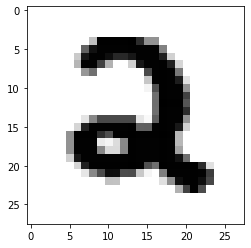

In [31]:
import matplotlib.pyplot as plt
import random 
%matplotlib inline

number = random.randint(0,10000)

plt.imshow(x_test[number], cmap = 'binary')
plt.show

pred = model.predict(x_test_norm)
predlabel = np.argmax(pred[number])


print("The prediction is :", predlabel)